In [2]:
import keras
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.layers.core import Activation
from keras import backend as K

In [114]:
numpy.random.seed(1234)

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
num_classes = 10
batch_size = 128
epochs = 1

In [117]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [118]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [119]:
# x_train = x_train.reshape(60000, 784)
# x_test = x_test.reshape(10000, 784)

In [120]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


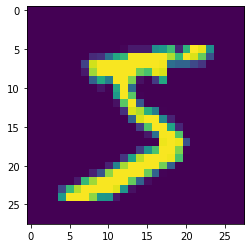

In [121]:
plt.imshow(x_train[0])

In [122]:
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

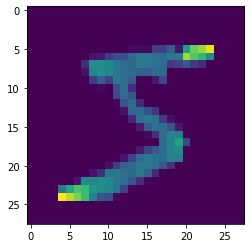

In [123]:
plt.imshow(x_train[0])

In [124]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(24, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [125]:
keras.utils.print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 24)                18840     
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 200       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                90        
Total params: 19,130
Trainable params: 19,130
Non-trainable params: 0
_________________________________________________________________


In [129]:
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [130]:
model.reset_states()
model.fit(x_train, y_train, epochs=5, batch_size=20)

Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 1.0691 - acc: 0.6846
Epoch 2/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.4144 - acc: 0.8805
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.3420 - acc: 0.9005
Epoch 4/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.3022 - acc: 0.9121
Epoch 5/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.2729 - acc: 0.9201


In [131]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 25us/step


[0.2537476043790579, 0.928]

In [134]:
prediction = model.predict(x_test)

In [143]:
np.argmax(prediction[40])

1

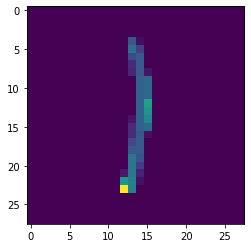

In [144]:
plt.imshow(x_test[40])